# Multiple Linear Regression Model #

### Time Series Regression Explaining Stock's Returns ###

In [1]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt

# Statistics
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import t

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from config import get_tickers
from data_downloader import get_market_data

The Multiple Linear Regression Model implies matrix notation:

1) $ \mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon} $

In [2]:
tickers = get_tickers(mod="3.2")

tickers

['AAPL', '^GSPC', 'IYW', 'DX-Y.NYB', '^TNX']

In [3]:
# Import data
data_regression = pd.DataFrame()

for ticker in tickers[:-1]:
    df = get_market_data(
        ticker=ticker, 
        start_date='2015-01-01', 
        end_date='2025-01-01', 
        returns=True
    )
    
    returns = df['returns'].rename(ticker)
    
    data_regression = pd.concat([data_regression, returns], axis=1)
    
    print(f'Data Ready for {ticker}')

Data Ready for AAPL
Data Ready for ^GSPC
Data Ready for IYW
Data Ready for DX-Y.NYB


In [4]:
data_regression.columns = ['stock_returns', 'mkt_returns', 'sector_returns', 'dollar_returns']

data_regression

stock_returns  mkt_returns  sector_returns  \
2015-01-05 00:00:00      -0.028576    -0.018447       -0.016081   
2015-01-06 00:00:00       0.000094    -0.008933       -0.013668   
2015-01-07 00:00:00       0.013925     0.011563        0.008380   
2015-01-08 00:00:00       0.037702     0.017730        0.024630   
2015-01-09 00:00:00       0.001072    -0.008439       -0.003839   
...                            ...          ...             ...   
2024-12-26 00:00:00       0.003171    -0.000406        0.000363   
2024-12-27 00:00:00      -0.013331    -0.011117       -0.014983   
2024-12-30 00:00:00      -0.013352    -0.010760       -0.012101   
2024-12-31 00:00:00      -0.007083    -0.004294       -0.009235   
2016-01-18 00:00:00            NaN          NaN             NaN   

                     dollar_returns  
2015-01-05 00:00:00        0.003288  
2015-01-06 00:00:00        0.001312  
2015-01-07 00:00:00        0.004253  
2015-01-08 00:00:00        0.005210  
2015-01-09 00:00:00       -0.004666  
...                             ...  
2024-12-26 00:00:00       -0.001202  
2024-12-27 00:00:00       -0.001203  
2024-12-30 00:00:00        0.001203  
2024-12-31 00:00:00        0.003324  
2016-01-18 00:00:00        0.001616  

[2516 rows x 4 columns]

In [5]:
# 10-Year Bond Yield
data_tnx = get_market_data(
    ticker=tickers[-1], 
    start_date='2015-01-01', 
    end_date='2025-01-01', 
    returns=False
)

data_tnx

Price       close   high    low   open  volume
Date                                          
2015-01-02  2.123  2.213  2.102  2.197       0
2015-01-05  2.039  2.109  2.037  2.102       0
2015-01-06  1.963  1.997  1.889  1.968       0
2015-01-07  1.954  2.008  1.938  1.975       0
2015-01-08  2.016  2.030  1.988  2.004       0
...           ...    ...    ...    ...     ...
2024-12-24  4.591  4.629  4.583  4.609       0
2024-12-26  4.579  4.641  4.573  4.631       0
2024-12-27  4.619  4.623  4.575  4.603       0
2024-12-30  4.545  4.577  4.537  4.577       0
2024-12-31  4.573  4.587  4.521  4.529       0

[2515 rows x 5 columns]

In [6]:
# Calculate daily rate
data_tnx['daily_rate'] = data_tnx['close'] / 100 / 360

data_tnx

Price       close   high    low   open  volume  daily_rate
Date                                                      
2015-01-02  2.123  2.213  2.102  2.197       0    0.000059
2015-01-05  2.039  2.109  2.037  2.102       0    0.000057
2015-01-06  1.963  1.997  1.889  1.968       0    0.000055
2015-01-07  1.954  2.008  1.938  1.975       0    0.000054
2015-01-08  2.016  2.030  1.988  2.004       0    0.000056
...           ...    ...    ...    ...     ...         ...
2024-12-24  4.591  4.629  4.583  4.609       0    0.000128
2024-12-26  4.579  4.641  4.573  4.631       0    0.000127
2024-12-27  4.619  4.623  4.575  4.603       0    0.000128
2024-12-30  4.545  4.577  4.537  4.577       0    0.000126
2024-12-31  4.573  4.587  4.521  4.529       0    0.000127

[2515 rows x 6 columns]

In [7]:
# Add the Daily Rate
data_regression['10_year_bond'] = data_tnx['daily_rate']

# Drop nans
data_regression.dropna(inplace = True)

data_regression

stock_returns  mkt_returns  sector_returns  \
2015-01-05 00:00:00      -0.028576    -0.018447       -0.016081   
2015-01-06 00:00:00       0.000094    -0.008933       -0.013668   
2015-01-07 00:00:00       0.013925     0.011563        0.008380   
2015-01-08 00:00:00       0.037702     0.017730        0.024630   
2015-01-09 00:00:00       0.001072    -0.008439       -0.003839   
...                            ...          ...             ...   
2024-12-24 00:00:00       0.011413     0.010982        0.010028   
2024-12-26 00:00:00       0.003171    -0.000406        0.000363   
2024-12-27 00:00:00      -0.013331    -0.011117       -0.014983   
2024-12-30 00:00:00      -0.013352    -0.010760       -0.012101   
2024-12-31 00:00:00      -0.007083    -0.004294       -0.009235   

                     dollar_returns  10_year_bond  
2015-01-05 00:00:00        0.003288      0.000057  
2015-01-06 00:00:00        0.001312      0.000055  
2015-01-07 00:00:00        0.004253      0.000054  
2015-01-08 00:00:00        0.005210      0.000056  
2015-01-09 00:00:00       -0.004666      0.000055  
...                             ...           ...  
2024-12-24 00:00:00        0.002034      0.000128  
2024-12-26 00:00:00       -0.001202      0.000127  
2024-12-27 00:00:00       -0.001203      0.000128  
2024-12-30 00:00:00        0.001203      0.000126  
2024-12-31 00:00:00        0.003324      0.000127  

[2513 rows x 5 columns]

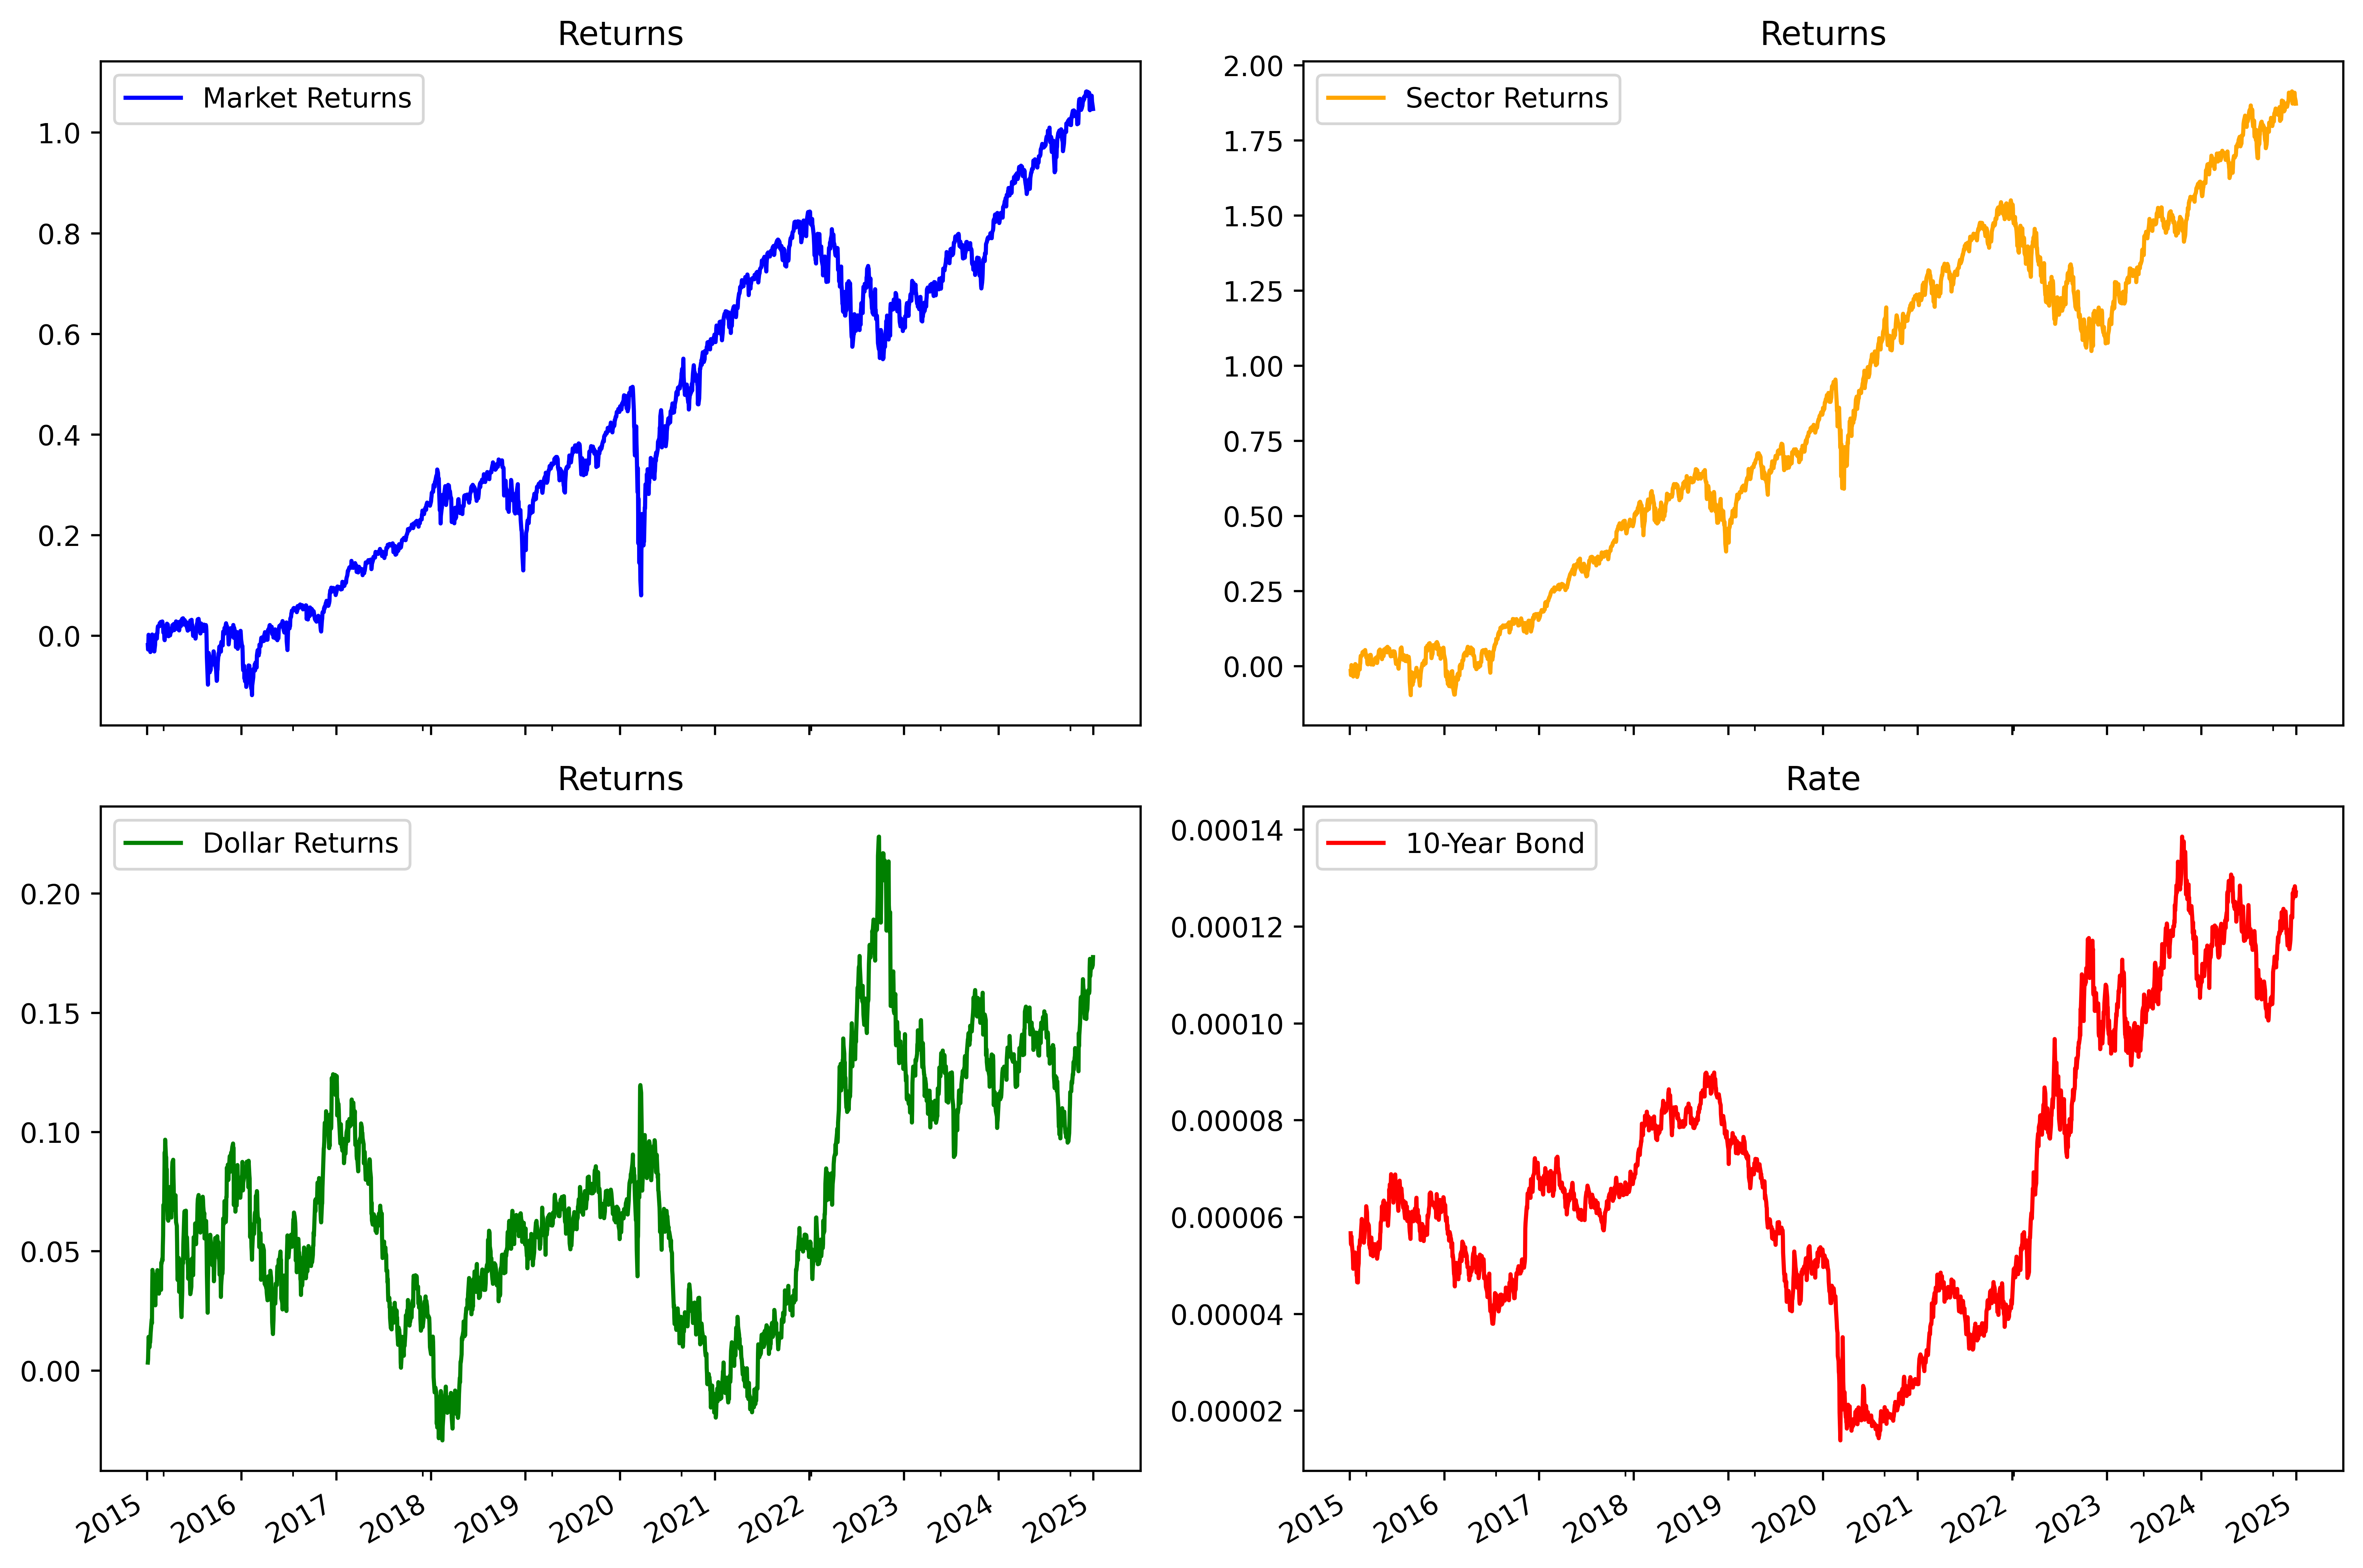

In [8]:
# Make a Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=600, sharex=True)  # 2 rows, 2 columns

# First Graph
data_regression['mkt_returns'].cumsum().plot(ax=axs[0, 0], color='blue', label='Market Returns')
axs[0, 0].set_title('Returns')
axs[0, 0].legend()

# Second Graph
data_regression['sector_returns'].cumsum().plot(ax=axs[0, 1], color='orange', label='Sector Returns')
axs[0, 1].set_title('Returns')
axs[0, 1].legend()

# Third Graph
data_regression['dollar_returns'].cumsum().plot(ax=axs[1, 0], color='green', label='Dollar Returns')
axs[1, 0].set_title('Returns')
axs[1, 0].legend()

# Fourth
data_regression['10_year_bond'].plot(ax=axs[1, 1], color='red', label='10-Year Bond')
axs[1, 1].set_title('Rate')
axs[1, 1].legend()

# Show
plt.tight_layout()
plt.show()

In [9]:
# Correlation Matrix
data_regression.corr()

stock_returns  mkt_returns  sector_returns  dollar_returns  \
stock_returns        1.000000     0.748184        0.826926       -0.061567   
mkt_returns          0.748184     1.000000        0.914129       -0.110223   
sector_returns       0.826926     0.914129        1.000000       -0.087524   
dollar_returns      -0.061567    -0.110223       -0.087524        1.000000   
10_year_bond        -0.020855    -0.003722       -0.006641        0.020515   

                10_year_bond  
stock_returns      -0.020855  
mkt_returns        -0.003722  
sector_returns     -0.006641  
dollar_returns      0.020515  
10_year_bond        1.000000

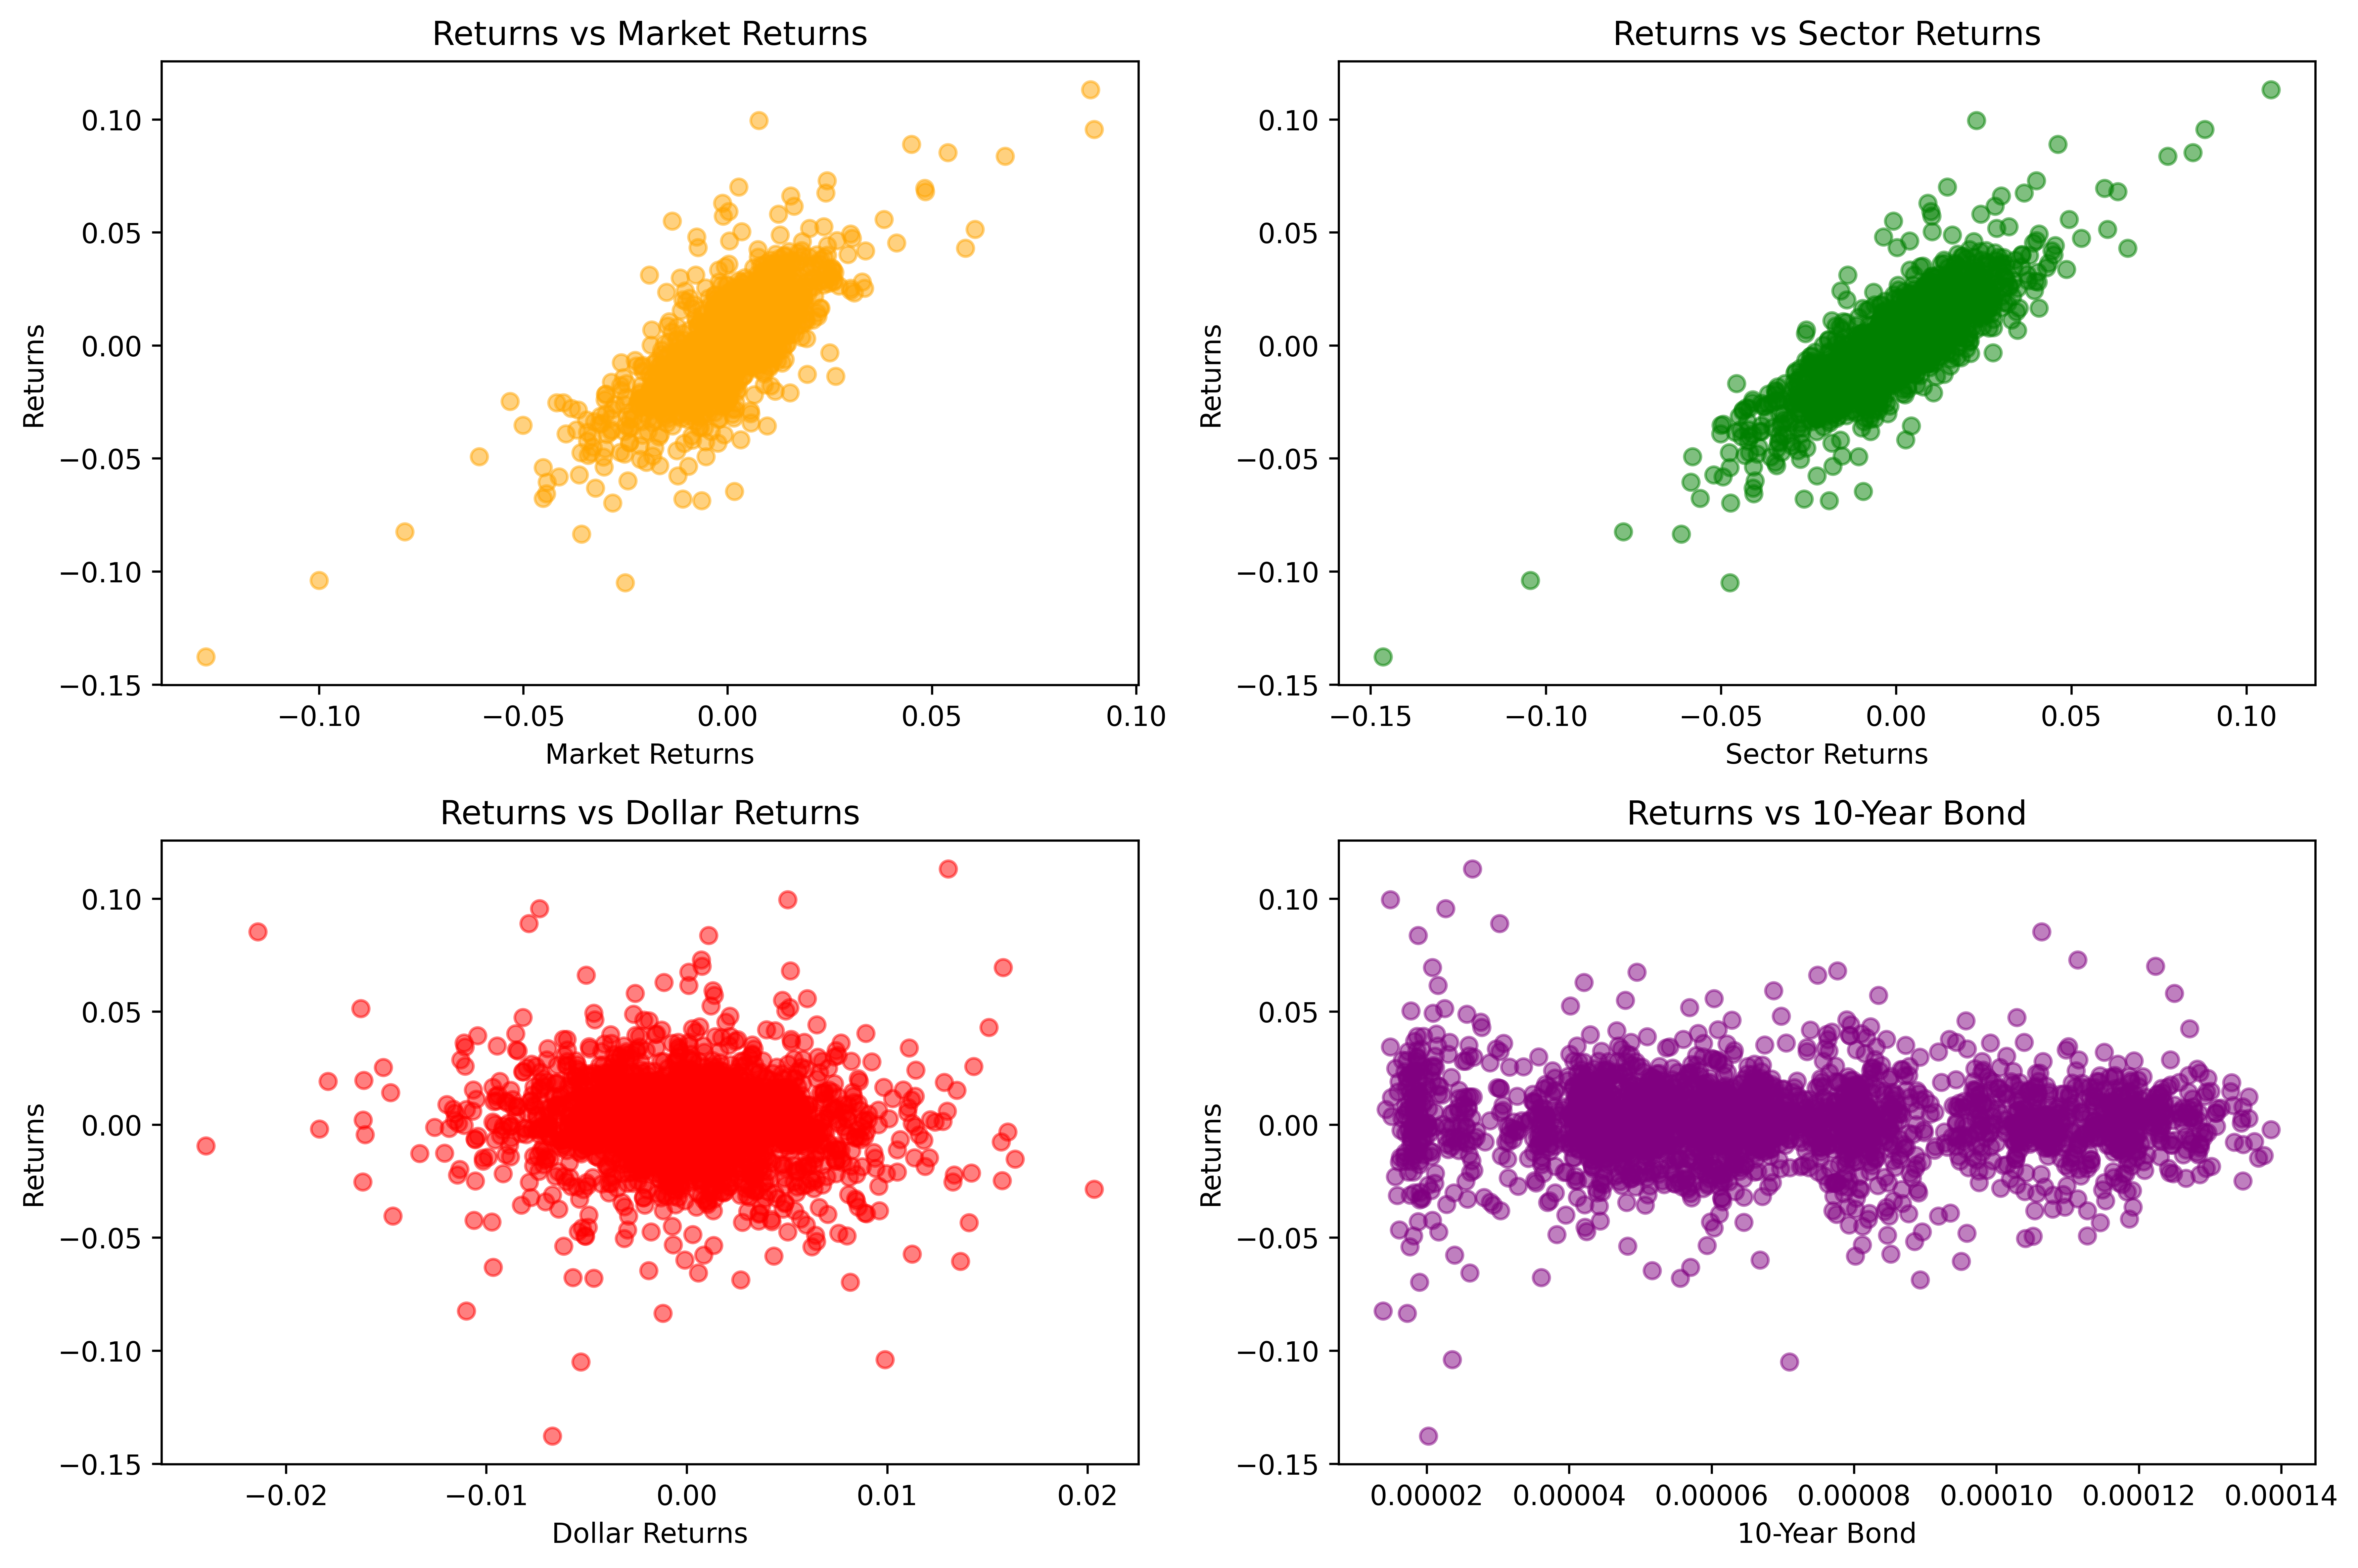

In [10]:
# Setup subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=600)

# Variables to plot against 'returns'
variables = ['mkt_returns', 'sector_returns', 'dollar_returns', '10_year_bond']
titles = ['Market Returns', 'Sector Returns', 'Dollar Returns', '10-Year Bond']
colors = ['orange', 'green', 'red', 'purple']

# Create scatter plots
for i, (var, title, color) in enumerate(zip(variables, titles, colors)):
    row, col = divmod(i, 2)
    axs[row, col].scatter(data_regression[var], data_regression['stock_returns'], alpha=0.5, color=color)
    axs[row, col].set_title(f'Returns vs {title}')
    axs[row, col].set_xlabel(title)
    axs[row, col].set_ylabel('Returns')

# Layout and show
plt.tight_layout()
plt.show()

In [11]:
# Filter Data to exclude outliers
filtered_data = data_regression[(np.abs(data_regression - data_regression.mean()) <= 3 * data_regression.std())]

filtered_data.dropna(inplace = True)

filtered_data

stock_returns  mkt_returns  sector_returns  \
2015-01-05 00:00:00      -0.028576    -0.018447       -0.016081   
2015-01-06 00:00:00       0.000094    -0.008933       -0.013668   
2015-01-07 00:00:00       0.013925     0.011563        0.008380   
2015-01-08 00:00:00       0.037702     0.017730        0.024630   
2015-01-09 00:00:00       0.001072    -0.008439       -0.003839   
...                            ...          ...             ...   
2024-12-24 00:00:00       0.011413     0.010982        0.010028   
2024-12-26 00:00:00       0.003171    -0.000406        0.000363   
2024-12-27 00:00:00      -0.013331    -0.011117       -0.014983   
2024-12-30 00:00:00      -0.013352    -0.010760       -0.012101   
2024-12-31 00:00:00      -0.007083    -0.004294       -0.009235   

                     dollar_returns  10_year_bond  
2015-01-05 00:00:00        0.003288      0.000057  
2015-01-06 00:00:00        0.001312      0.000055  
2015-01-07 00:00:00        0.004253      0.000054  
2015-01-08 00:00:00        0.005210      0.000056  
2015-01-09 00:00:00       -0.004666      0.000055  
...                             ...           ...  
2024-12-24 00:00:00        0.002034      0.000128  
2024-12-26 00:00:00       -0.001202      0.000127  
2024-12-27 00:00:00       -0.001203      0.000128  
2024-12-30 00:00:00        0.001203      0.000126  
2024-12-31 00:00:00        0.003324      0.000127  

[2432 rows x 5 columns]

In [12]:
# The Correlation Matrix
filtered_data.corr()

stock_returns  mkt_returns  sector_returns  dollar_returns  \
stock_returns        1.000000     0.701659        0.792358       -0.067411   
mkt_returns          0.701659     1.000000        0.886955       -0.132161   
sector_returns       0.792358     0.886955        1.000000       -0.096404   
dollar_returns      -0.067411    -0.132161       -0.096404        1.000000   
10_year_bond        -0.044126    -0.035186       -0.032762        0.036297   

                10_year_bond  
stock_returns      -0.044126  
mkt_returns        -0.035186  
sector_returns     -0.032762  
dollar_returns      0.036297  
10_year_bond        1.000000

In [13]:
# Create the Y Vector
Y_Vector = filtered_data["stock_returns"]

Y_Vector

2015-01-05   -0.028576
2015-01-06    0.000094
2015-01-07    0.013925
2015-01-08    0.037702
2015-01-09    0.001072
                ...   
2024-12-24    0.011413
2024-12-26    0.003171
2024-12-27   -0.013331
2024-12-30   -0.013352
2024-12-31   -0.007083
Name: stock_returns, Length: 2432, dtype: float64

In [14]:
# Create the Information Matrix
Information_Matrix = filtered_data.copy().drop('stock_returns', axis=1)

# Add a constant
Information_Matrix = sm.add_constant(Information_Matrix)

Information_Matrix

const  mkt_returns  sector_returns  dollar_returns  \
2015-01-05 00:00:00    1.0    -0.018447       -0.016081        0.003288   
2015-01-06 00:00:00    1.0    -0.008933       -0.013668        0.001312   
2015-01-07 00:00:00    1.0     0.011563        0.008380        0.004253   
2015-01-08 00:00:00    1.0     0.017730        0.024630        0.005210   
2015-01-09 00:00:00    1.0    -0.008439       -0.003839       -0.004666   
...                    ...          ...             ...             ...   
2024-12-24 00:00:00    1.0     0.010982        0.010028        0.002034   
2024-12-26 00:00:00    1.0    -0.000406        0.000363       -0.001202   
2024-12-27 00:00:00    1.0    -0.011117       -0.014983       -0.001203   
2024-12-30 00:00:00    1.0    -0.010760       -0.012101        0.001203   
2024-12-31 00:00:00    1.0    -0.004294       -0.009235        0.003324   

                     10_year_bond  
2015-01-05 00:00:00      0.000057  
2015-01-06 00:00:00      0.000055  
2015-01-07 00:00:00      0.000054  
2015-01-08 00:00:00      0.000056  
2015-01-09 00:00:00      0.000055  
...                           ...  
2024-12-24 00:00:00      0.000128  
2024-12-26 00:00:00      0.000127  
2024-12-27 00:00:00      0.000128  
2024-12-30 00:00:00      0.000126  
2024-12-31 00:00:00      0.000127  

[2432 rows x 5 columns]

In [15]:
# For estimating the coefficients with the OLS we need to assess the non-perfect collinearity condition with the matrix rank
Rank = np.linalg.matrix_rank(Information_Matrix)

# Since we are estimating four betas, the rank must be the number of columns in the Information Matrix
if Rank == len(Information_Matrix.columns):
    print(f"Matrix Rank is {Rank}; there is no evidence of Perfect Multicollinearity.")
else:
    print(f"Matrix Rank is {Rank}; there is evidence of Perfect Multicollinearity between two or more variables.")

Matrix Rank is 5; there is no evidence of Perfect Multicollinearity.


The beta calculation in the Matrix Form:
1) $ \boldsymbol{\beta}=(\mathbf{X}^⊤\mathbf{X})^{-1}(\mathbf{X}^⊤\mathbf{y}) $

The vector of betas is a kx1 vector containing the coefficients of the regression model, where k is the number of parameters to estimate

In [16]:
# Transpose of the Information Matrix
Information_Matrix_T = Information_Matrix.transpose()

Information_Matrix_T

2015-01-05  2015-01-06  2015-01-07  2015-01-08  2015-01-09  \
const             1.000000    1.000000    1.000000    1.000000    1.000000   
mkt_returns      -0.018447   -0.008933    0.011563    0.017730   -0.008439   
sector_returns   -0.016081   -0.013668    0.008380    0.024630   -0.003839   
dollar_returns    0.003288    0.001312    0.004253    0.005210   -0.004666   
10_year_bond      0.000057    0.000055    0.000054    0.000056    0.000055   

                2015-01-12  2015-01-13  2015-01-14  2015-01-15  2015-01-16  \
const             1.000000    1.000000    1.000000    1.000000    1.000000   
mkt_returns      -0.008127   -0.002582   -0.005830   -0.009291    0.013335   
sector_returns   -0.013748   -0.000195   -0.005279   -0.014813    0.008421   
dollar_returns    0.000435    0.003581   -0.001626    0.002059    0.001839   
10_year_bond      0.000053    0.000052    0.000051    0.000049    0.000050   

                ...  2024-12-17  2024-12-18  2024-12-19  2024-12-20  \
const           ...    1.000000    1.000000    1.000000    1.000000   
mkt_returns     ...   -0.003871   -0.029937   -0.000865    0.010810   
sector_returns  ...   -0.006000   -0.034367   -0.000313    0.015425   
dollar_returns  ...    0.000935    0.009954    0.003511   -0.007314   
10_year_bond    ...    0.000122    0.000125    0.000127    0.000126   

                2024-12-23  2024-12-24  2024-12-26  2024-12-27  2024-12-30  \
const             1.000000    1.000000    1.000000    1.000000    1.000000   
mkt_returns       0.007261    0.010982   -0.000406   -0.011117   -0.010760   
sector_returns    0.010377    0.010028    0.000363   -0.014983   -0.012101   
dollar_returns    0.003895    0.002034   -0.001202   -0.001203    0.001203   
10_year_bond      0.000128    0.000128    0.000127    0.000128    0.000126   

                2024-12-31  
const             1.000000  
mkt_returns      -0.004294  
sector_returns   -0.009235  
dollar_returns    0.003324  
10_year_bond      0.000127  

[5 rows x 2432 columns]

In [17]:
# Now we have to calculate the (X^⊤X)^{-1}, first the square of the Information Matrix
Information_Matrix_Square = Information_Matrix_T.dot(Information_Matrix)

# We could also use the command Information_Matrix_T @ Information_Matrix
Information_Matrix_Square

const  mkt_returns  sector_returns  dollar_returns  \
const           2432.000000     1.663225        2.552367        0.182542   
mkt_returns        1.663225     0.194187        0.249246       -0.011358   
sector_returns     2.552367     0.249246        0.406025       -0.011916   
dollar_returns     0.182542    -0.011358       -0.011916        0.039119   
10_year_bond       0.168122     0.000093        0.000147        0.000023   

                10_year_bond  
const               0.168122  
mkt_returns         0.000093  
sector_returns      0.000147  
dollar_returns      0.000023  
10_year_bond        0.000014

In [18]:
# The reason we needed to know the rank of the information matrix is because, only full rank matrix can be invertible
# Then we can calculate the Matrix Determinant, if it is different from zero, we can calculate the OLS coefficients
Information_Matrix_Square_Determinant = np.linalg.det(Information_Matrix_Square)

if Information_Matrix_Square_Determinant != 0:
    print(f"The Determinant of the Squared Information Matrix is {Information_Matrix_Square_Determinant} and different from zero")
else:
    print("Matrix NOT invertible")

The Determinant of the Squared Information Matrix is 3.1992900219815737e-06 and different from zero


In [19]:
# Now we have to get the Inverse Matrix
X_Variance_Matrix_Inverse = np.linalg.inv(Information_Matrix_Square)

X_Variance_Matrix_Inverse

array([[ 2.73153561e-03, -3.62552668e-03, -2.71262226e-03,
         5.02188535e-03, -3.34938109e+01],
       [-3.62552668e-03,  2.45390181e+01, -1.49781630e+01,
         2.55925758e+00,  3.42962322e+01],
       [-2.71262226e-03, -1.49781630e+01,  1.16470756e+01,
        -7.95199453e-01,  1.14601170e+01],
       [ 5.02188535e-03,  2.55925758e+00, -7.95199453e-01,
         2.61075282e+01, -1.14237870e+02],
       [-3.34938109e+01,  3.42962322e+01,  1.14601170e+01,
        -1.14237870e+02,  4.84120742e+05]])

In [20]:
# Now we have to obtain (X^⊤Y)
Y_Covariance_X = Information_Matrix_T.dot(Y_Vector)

Y_Covariance_X

const             2.872221
mkt_returns       0.229499
sector_returns    0.374419
dollar_returns   -0.009623
10_year_bond      0.000152
dtype: float64

In [21]:
# Now we can calculate the Betas
Beta = X_Variance_Matrix_Inverse.dot(Y_Covariance_X)

Beta_DF = pd.DataFrame(Beta, index = Information_Matrix.columns)
Beta_DF

0
const           0.000869
mkt_returns    -0.006273
sector_returns  0.925016
dollar_returns  0.035469
10_year_bond   -9.501905

In [22]:
# Now we can get the fitted values
Y_Hat = Information_Matrix.dot(Beta)

Y_Hat

2015-01-05   -0.014312
2015-01-06   -0.012190
2015-01-07    0.008183
2015-01-08    0.023194
2015-01-09   -0.003315
                ...   
2024-12-24    0.008936
2024-12-26   -0.000044
2024-12-27   -0.014183
2024-12-30   -0.011414
2024-12-31   -0.008736
Length: 2432, dtype: float64

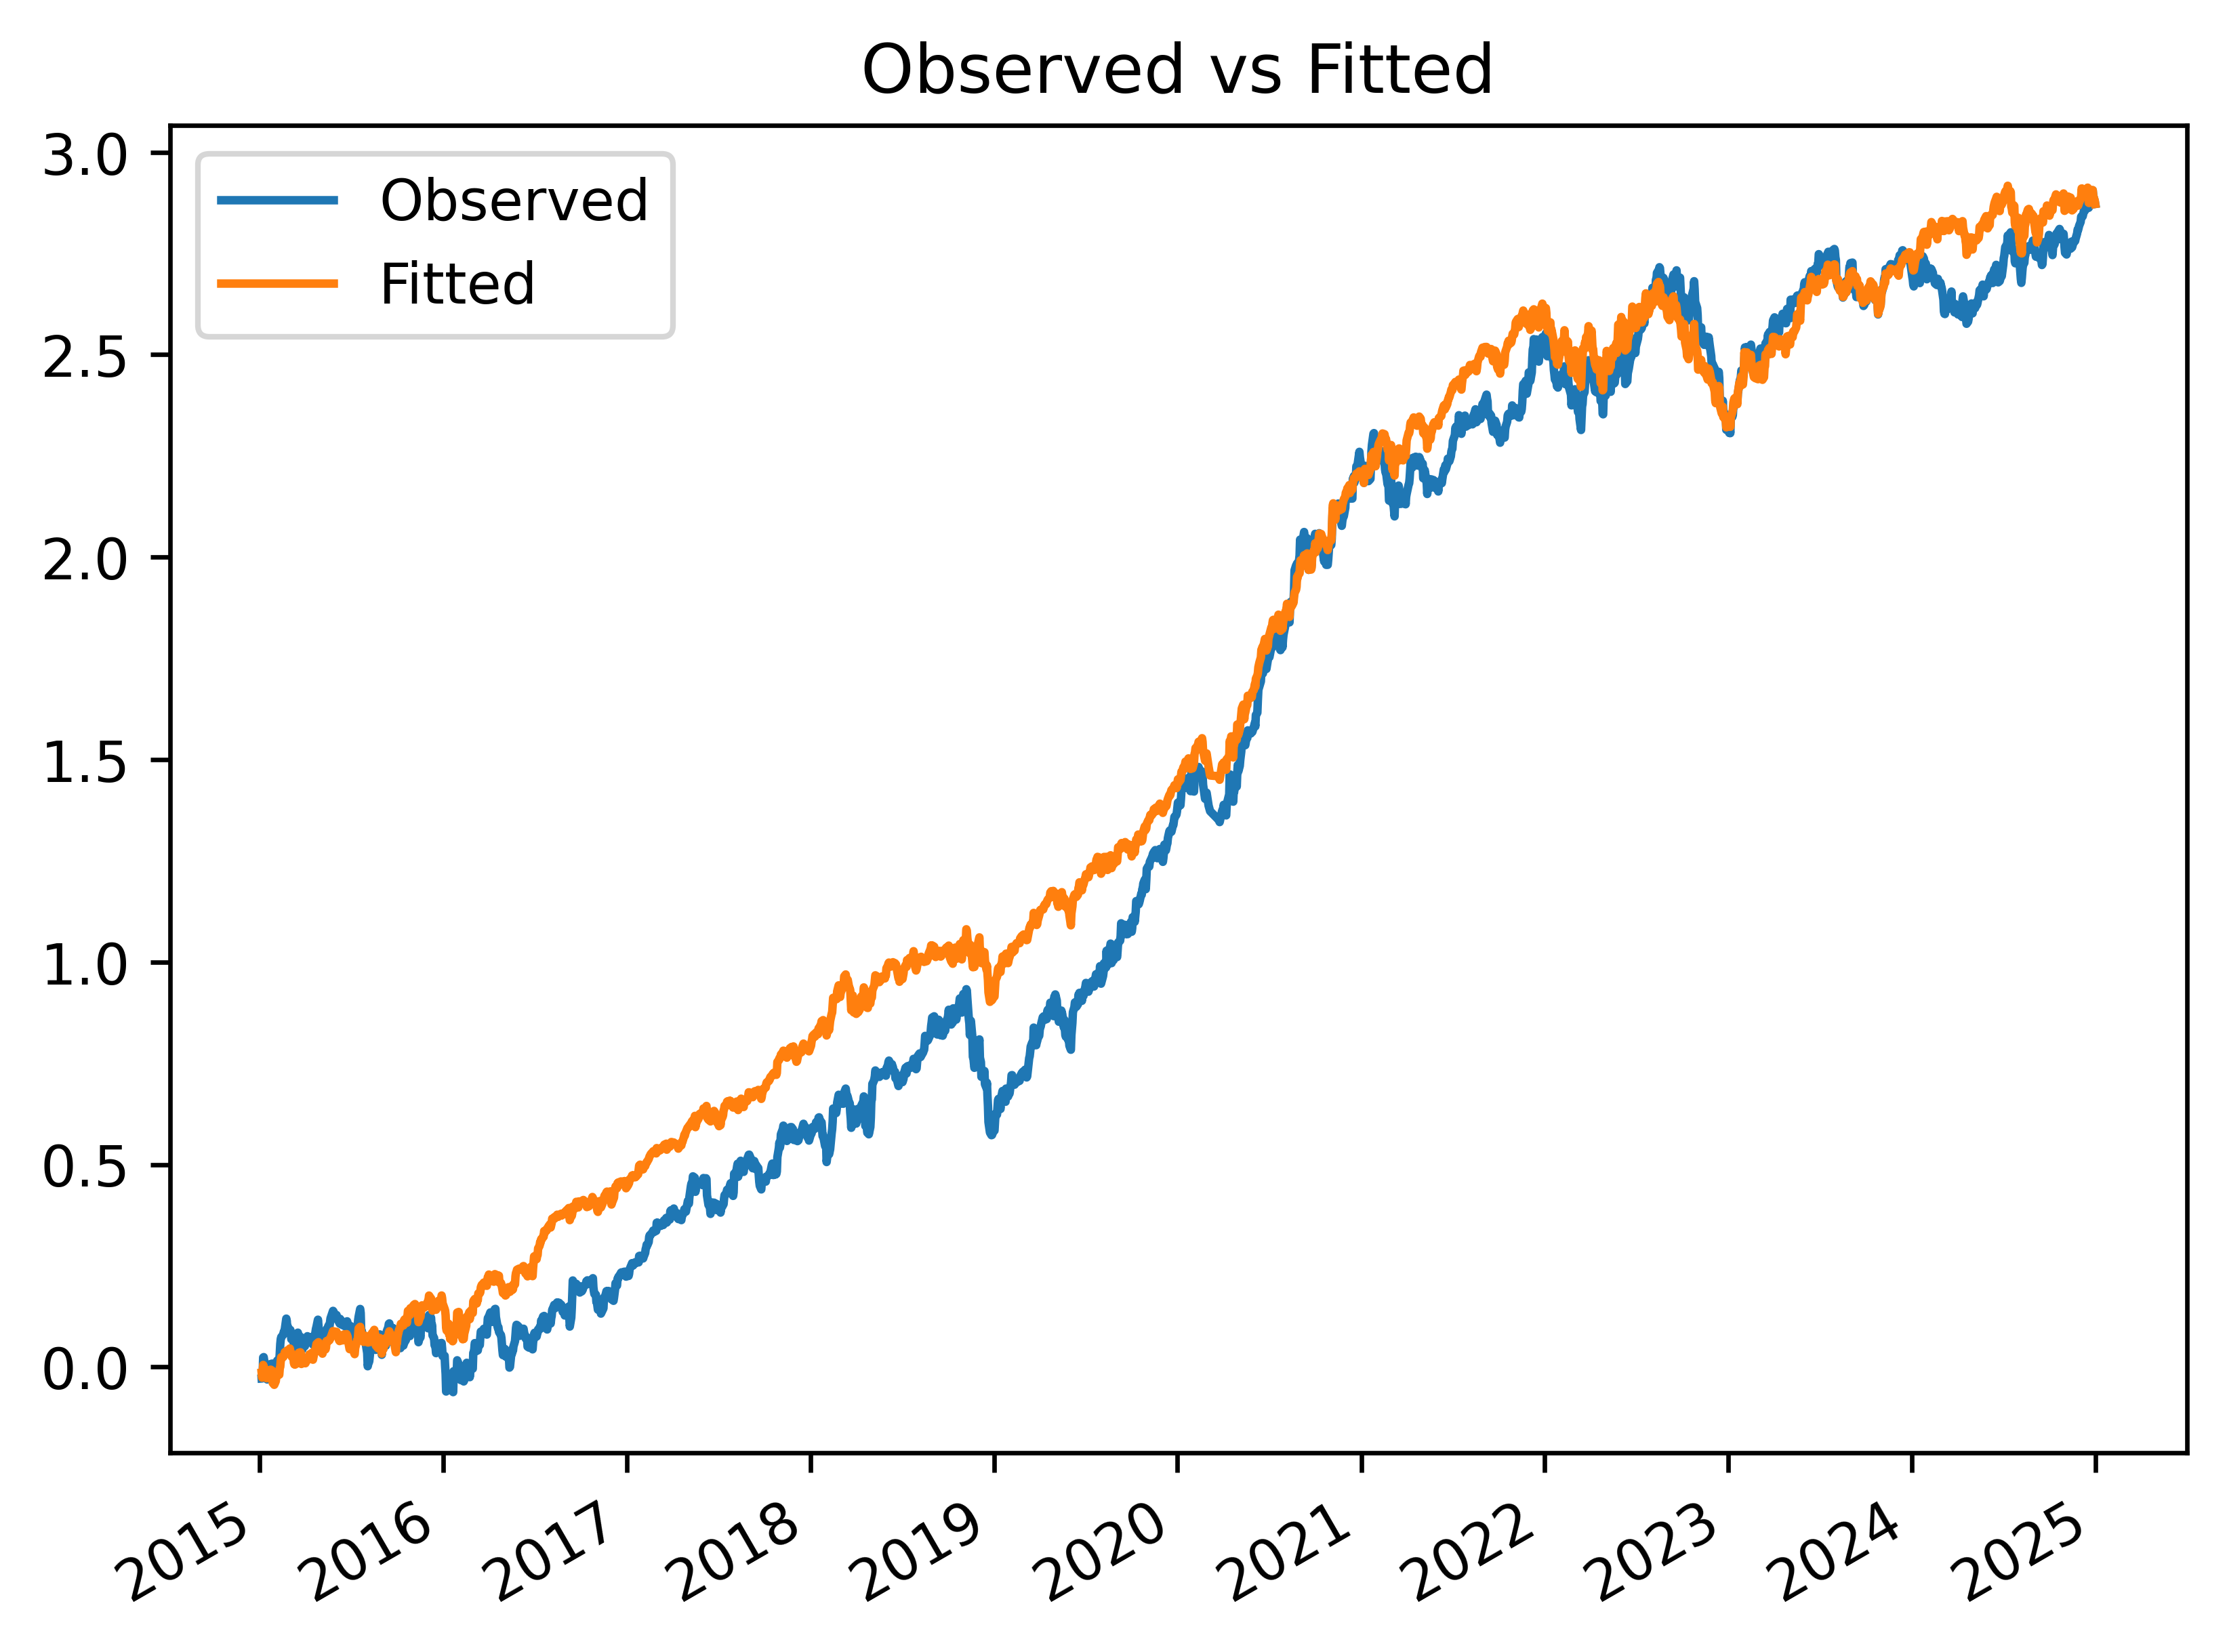

In [23]:
fig, ax1 = plt.subplots(dpi = 600)

filtered_data['expected_returns'] = Y_Hat

filtered_data['stock_returns'].cumsum().plot(label = 'Observed')
filtered_data['expected_returns'].cumsum().plot(label = 'Fitted')
plt.legend()
plt.title('Observed vs Fitted')

plt.show()

In [24]:
# We can get the Hat Matrix, which is a matrix used to transform the real values into the fitted values
Some_Matrix = Information_Matrix.dot(X_Variance_Matrix_Inverse)
Hat_Matrix = Some_Matrix.to_numpy() @ Information_Matrix_T.to_numpy()

Hat_Matrix

array([[ 0.00314135,  0.00131031, -0.00088494, ...,  0.00098549,
         0.00129039,  0.00030641],
       [ 0.00131031,  0.00109347,  0.00026435, ...,  0.00053743,
         0.00051715,  0.00039073],
       [-0.00088494,  0.00026435,  0.00229937, ..., -0.00086047,
        -0.00069995,  0.00042577],
       ...,
       [ 0.00098549,  0.00053743, -0.00086047, ...,  0.00288484,
         0.00264635,  0.00219467],
       [ 0.00129039,  0.00051715, -0.00069995, ...,  0.00264635,
         0.00262436,  0.00219479],
       [ 0.00030641,  0.00039073,  0.00042577, ...,  0.00219467,
         0.00219479,  0.00250995]])

In [25]:
print(Information_Matrix.shape)
print(X_Variance_Matrix_Inverse.shape)
print(Some_Matrix.shape)
print(Information_Matrix_T.shape)

(2432, 5)
(5, 5)
(2432, 5)
(5, 2432)


In [26]:
# Let us check if this is true
Y_Hat_2 = Hat_Matrix.dot(Y_Vector)

Y_Hat_2

array([-0.01431218, -0.01218952,  0.00818294, ..., -0.0141827 ,
       -0.01141397, -0.008736  ])

In [27]:
# Hat Matrix is Symmetric and Idempotent
Hat_Matrix_Square = (Hat_Matrix.transpose()).dot(Hat_Matrix)

if Hat_Matrix.all() == Hat_Matrix_Square.all():
    print("It is indeed idempotent")
else:
    print("Wrong!")

It is indeed idempotent


In [28]:
# We can calculate the residuals using the Hat Matrix
Identity_Matrix = np.identity(len(Y_Vector))
Residuals_Vector = (Identity_Matrix - Hat_Matrix).dot(Y_Vector)

print(f"The Residuals Mean is: {Residuals_Vector.mean().round(3)}")
print(f"The Residuals Variance is: {Residuals_Vector.var()}")

The Residuals Mean is: 0.0
The Residuals Variance is: 8.326291196242211e-05


In [29]:
# Residual Returns
filtered_data['residuals'] = Residuals_Vector

filtered_data

stock_returns  mkt_returns  sector_returns  \
2015-01-05 00:00:00      -0.028576    -0.018447       -0.016081   
2015-01-06 00:00:00       0.000094    -0.008933       -0.013668   
2015-01-07 00:00:00       0.013925     0.011563        0.008380   
2015-01-08 00:00:00       0.037702     0.017730        0.024630   
2015-01-09 00:00:00       0.001072    -0.008439       -0.003839   
...                            ...          ...             ...   
2024-12-24 00:00:00       0.011413     0.010982        0.010028   
2024-12-26 00:00:00       0.003171    -0.000406        0.000363   
2024-12-27 00:00:00      -0.013331    -0.011117       -0.014983   
2024-12-30 00:00:00      -0.013352    -0.010760       -0.012101   
2024-12-31 00:00:00      -0.007083    -0.004294       -0.009235   

                     dollar_returns  10_year_bond  expected_returns  residuals  
2015-01-05 00:00:00        0.003288      0.000057         -0.014312  -0.014264  
2015-01-06 00:00:00        0.001312      0.000055         -0.012190   0.012284  
2015-01-07 00:00:00        0.004253      0.000054          0.008183   0.005742  
2015-01-08 00:00:00        0.005210      0.000056          0.023194   0.014509  
2015-01-09 00:00:00       -0.004666      0.000055         -0.003315   0.004387  
...                             ...           ...               ...        ...  
2024-12-24 00:00:00        0.002034      0.000128          0.008936   0.002476  
2024-12-26 00:00:00       -0.001202      0.000127         -0.000044   0.003215  
2024-12-27 00:00:00       -0.001203      0.000128         -0.014183   0.000852  
2024-12-30 00:00:00        0.001203      0.000126         -0.011414  -0.001938  
2024-12-31 00:00:00        0.003324      0.000127         -0.008736   0.001653  

[2432 rows x 7 columns]

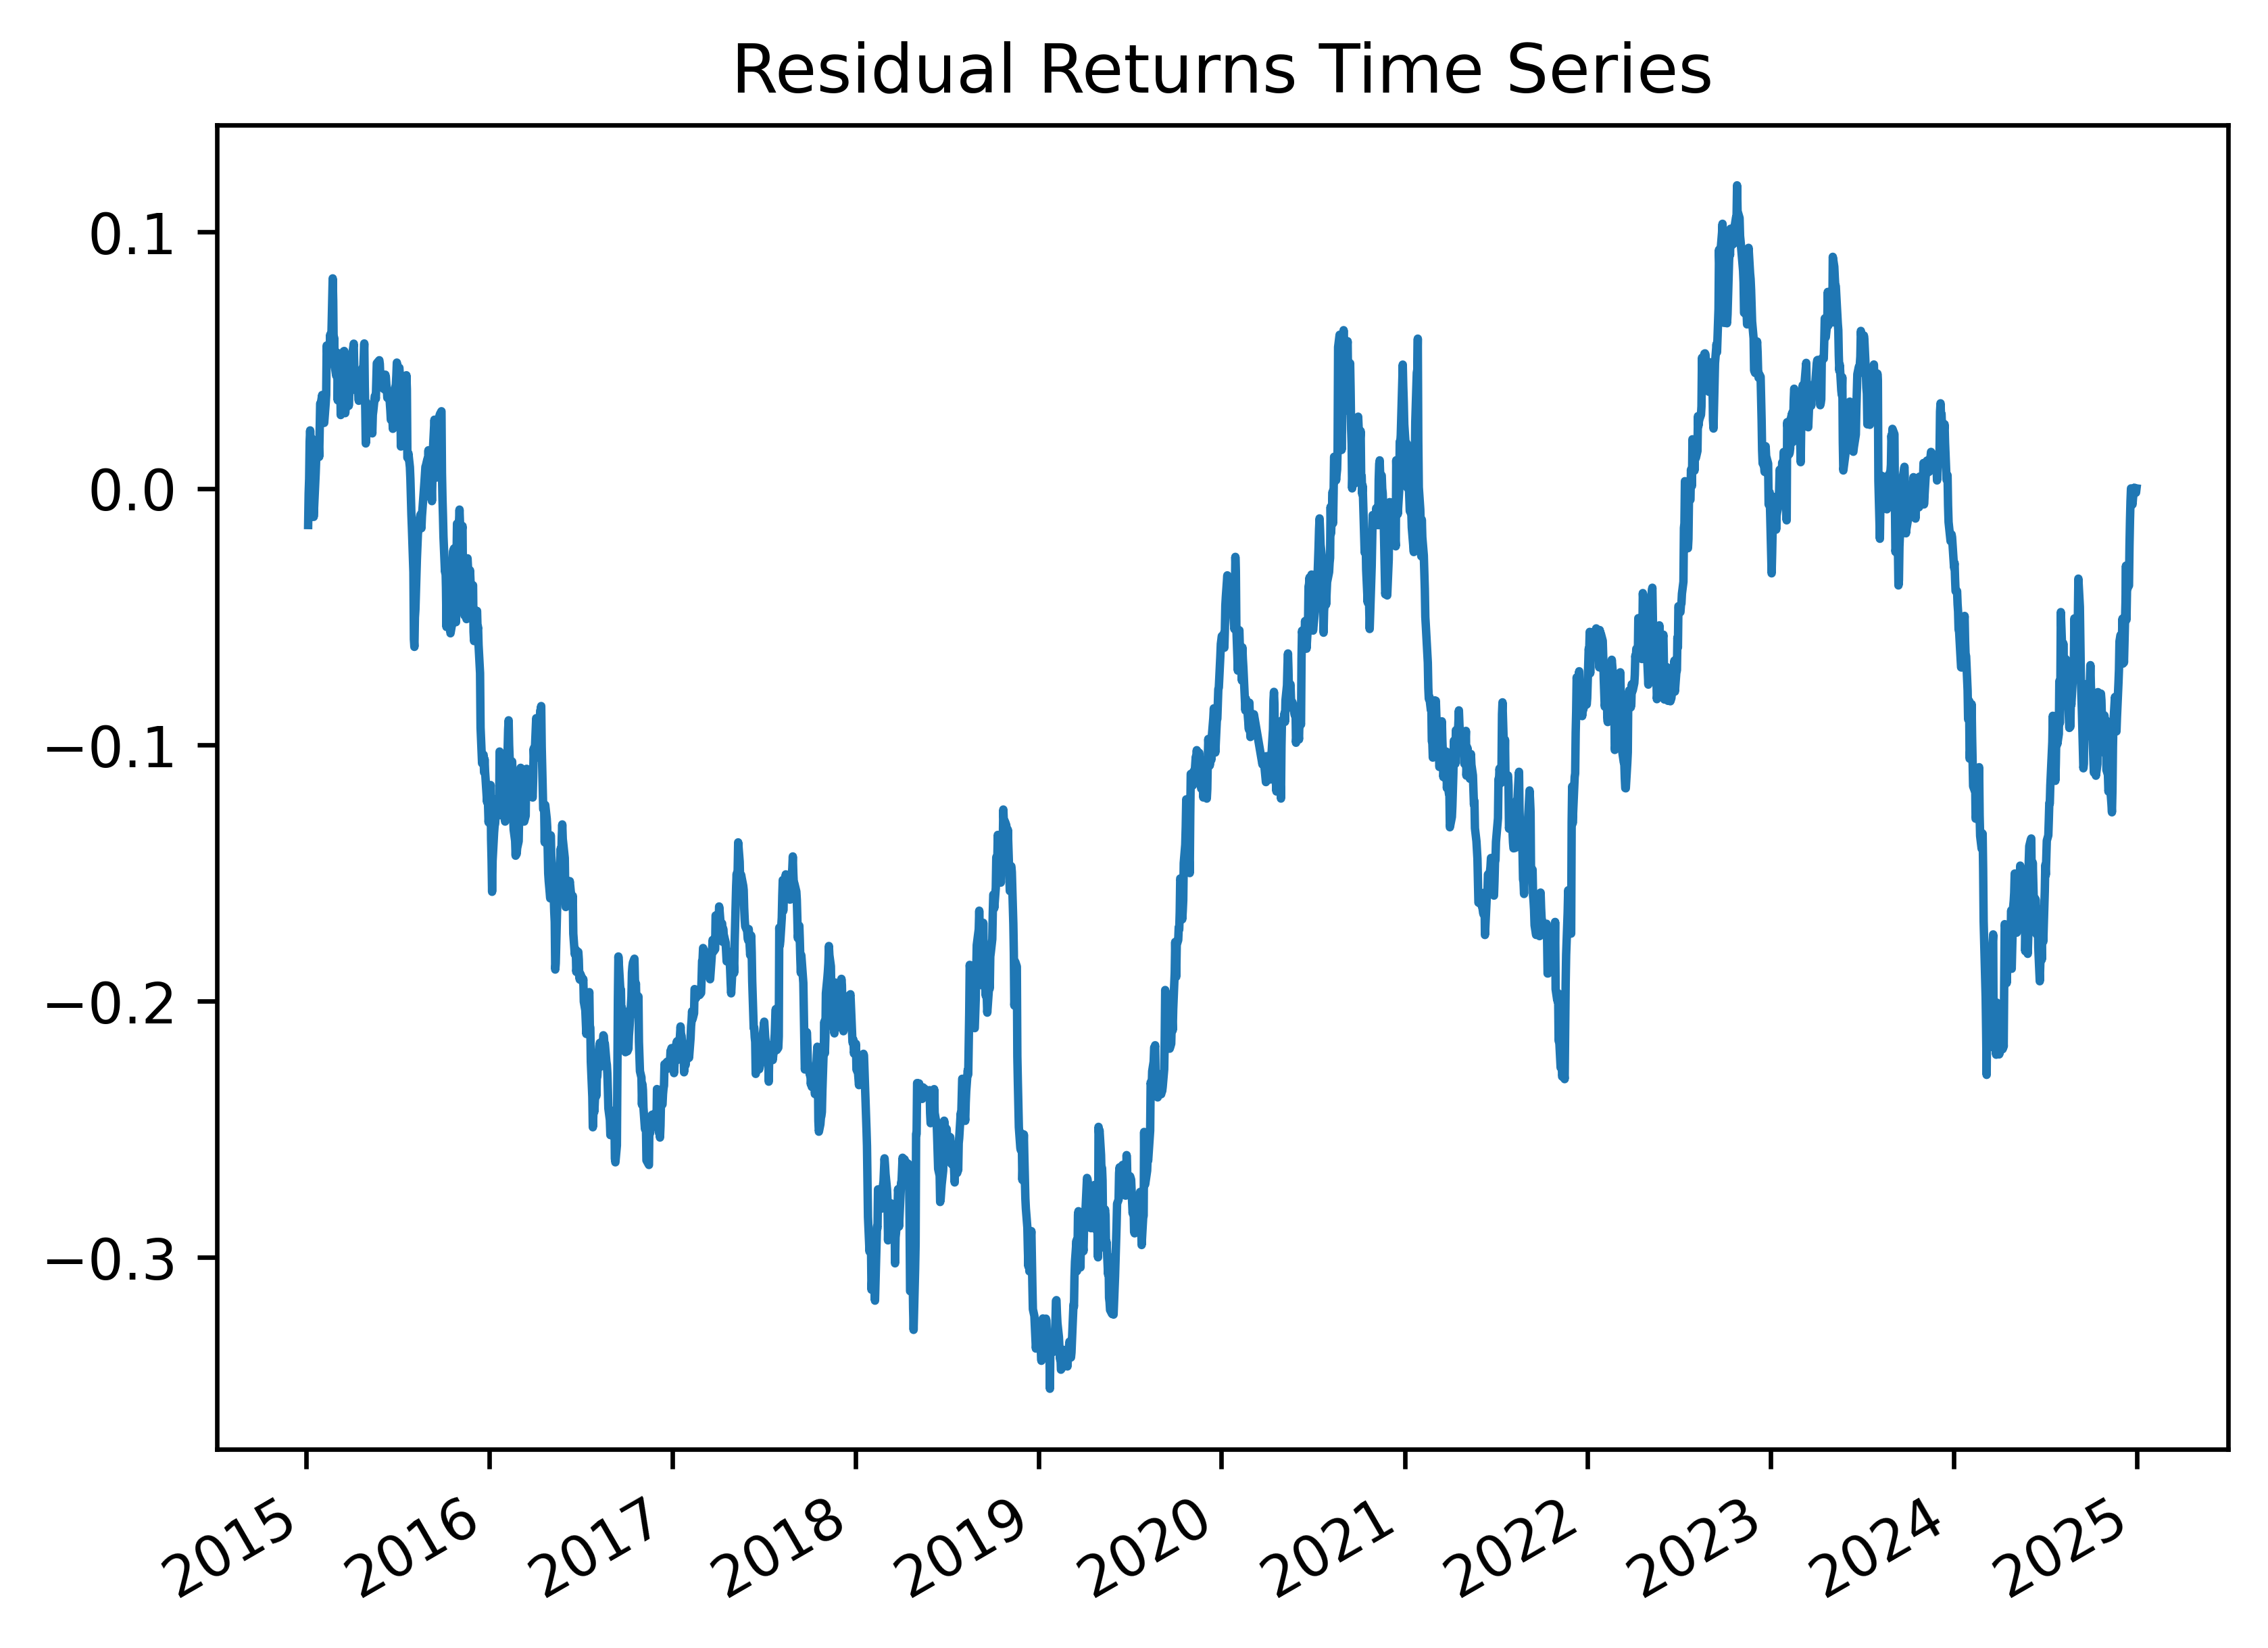

In [30]:
# Plot
fig, ax1 = plt.subplots(dpi = 600)
filtered_data['residuals'].cumsum().plot()
plt.title('Residual Returns Time Series')
plt.show()

In [31]:
# The OLS Assumptions establish that the covariances and the residuals must be uncorrelated
Intercorrelation_Vector = Information_Matrix_T.dot(Residuals_Vector)

print(Intercorrelation_Vector.round(5))

const             0.0
mkt_returns      -0.0
sector_returns   -0.0
dollar_returns    0.0
10_year_bond      0.0
dtype: float64


We can use this expression to calculate the Bias of the Beta coefficients:

1) $ S=(\mathbf{X}^⊤\mathbf{X})^{-1}(\mathbf{X}^⊤\boldsymbol{\varepsilon}) $


In [32]:
# Calculate Bias
Bias = X_Variance_Matrix_Inverse.dot(Intercorrelation_Vector)

print("""
Biases are very close to zero.
""")
print(Bias)


Biases are very close to zero.

[ 1.32393887e-18 -8.04564198e-16  2.41650872e-16 -3.17292167e-17
 -1.18546846e-14]


Now we want to calculate the sum of squares

1) $ RSS=\boldsymbol{\varepsilon}^⊤\boldsymbol{\varepsilon}=\mathbf{y}^⊤\mathbf{y}-\boldsymbol{\beta}^⊤\mathbf{X}^⊤\mathbf{y} $
2) $ ESS=\boldsymbol{\beta}^⊤\mathbf{X}^⊤\mathbf{y}-\bar{\mathbf{y}}^2 $
3) $ TSS=\mathbf{y}^⊤\mathbf{y}-\bar{\mathbf{y}}^2 $

In [33]:
RSS = (Residuals_Vector.transpose()).dot(Residuals_Vector)
ESS = (Beta.transpose()).dot(Y_Covariance_X) - (sum(Y_Vector)**2)/len(Y_Vector)
TSS = (Y_Vector.transpose()).dot(Y_Vector) - (sum(Y_Vector)**2)/len(Y_Vector)

print(f"The Residuals Sum of Squares is: {RSS}")
print(f"The Estimation Sum of Squares is: {ESS}")
print(f"The Total Sum of Squares is: {TSS}")

The Residuals Sum of Squares is: 0.2024954018926106
The Estimation Sum of Squares is: 0.3422241399916713
The Total Sum of Squares is: 0.5447195418842816


In [34]:
# We can calculate the R-Squared Coefficient
R_Squared = ESS/TSS

print(f"The R-Squared Coefficient is: {R_Squared}")

The R-Squared Coefficient is: 0.6282575044175158


In [35]:
# Now calculate the Residual Variance with n - k degrees of freedom (adjusted to the sample)
Residuals_Variance = RSS/(len(Y_Vector) - Hat_Matrix.trace())

print(f"The Residuals Variance is: {Residuals_Variance}")

The Residuals Variance is: 8.343444659769699e-05


We use the Residual Variance to calculate the covariances between all the beta coefficients:

1) $ C=\frac{\boldsymbol{\varepsilon}^⊤\boldsymbol{\varepsilon}}{n-k}(\mathbf{X}^⊤\mathbf{X})^{-1} $

In [36]:
# The Diagonal of the Covariance Matrix contains the standard errors of the beta coefficients
Covariance_Matrix = Residuals_Variance * X_Variance_Matrix_Inverse

Covariance_Matrix

array([[ 2.27904162e-07, -3.02493812e-07, -2.26326137e-07,
         4.18998225e-07, -2.79453758e-03],
       [-3.02493812e-07,  2.04739940e-03, -1.24969474e-03,
         2.13530240e-04,  2.86148716e-03],
       [-2.26326137e-07, -1.24969474e-03,  9.71767309e-04,
        -6.63470263e-05,  9.56168523e-04],
       [ 4.18998225e-07,  2.13530240e-04, -6.63470263e-05,
         2.17826717e-03, -9.53137349e-03],
       [-2.79453758e-03,  2.86148716e-03,  9.56168523e-04,
        -9.53137349e-03,  4.03923462e+01]])

In [37]:
# Take the squared-root
Beta_Standards_Errors = np.sqrt(Covariance_Matrix.diagonal())

Beta_Standards_Errors

array([4.77393090e-04, 4.52481977e-02, 3.11731825e-02, 4.66719098e-02,
       6.35549732e+00])

In [38]:
# Calculate the T-Values
T_Values = Beta/Beta_Standards_Errors

T_Values

array([ 1.81967786, -0.13862948, 29.67344488,  0.75995738, -1.49506869])

In [39]:
# How many degrees of freedom we have?
df = len(Y_Vector) - Hat_Matrix.trace()

print(f"We have {df.round()} degrees of freedom.")

We have 2427.0 degrees of freedom.


In [40]:
# The Hypothesis Testing implies to reject the null hypothesis if the t-values are higher than the critic t-value
# For 293 degrees of freedom the critic t-value approaches to 1.96
# Then we can calculate the upper and lower limits

Beta_Lower_Limit = Beta - 1.96*Beta_Standards_Errors
Beta_Upper_Limit = Beta + 1.96*Beta_Standards_Errors

print(Beta_Lower_Limit)
print(Beta_Upper_Limit)

[-6.69888190e-05 -9.49592018e-02  8.63916276e-01 -5.60082810e-02
 -2.19586798e+01]
[1.80439209e-03 8.24137332e-02 9.86115151e-01 1.26945606e-01
 2.95486968e+00]


In [41]:
# We can build a dataframe that contains all the information
Proof_DF = pd.DataFrame(
    {
     "T_Values": T_Values, 
     "Beta_Inferior_Limit": Beta_Lower_Limit, 
     "Beta_Superior_Limit": Beta_Upper_Limit
     }
    )

Proof_DF

T_Values  Beta_Inferior_Limit  Beta_Superior_Limit
0   1.819678            -0.000067             0.001804
1  -0.138629            -0.094959             0.082414
2  29.673445             0.863916             0.986115
3   0.759957            -0.056008             0.126946
4  -1.495069           -21.958680             2.954870

In [42]:
# Let us get the p-values, if these are less than 0.05, we reject the null hypothesis confirming statistical significance
Proof_DF["p-values"] = 2*(t.sf(
    abs(Proof_DF.T_Values), 
    len(Y_Vector) - Hat_Matrix.trace()
    ).round(3)
    )

Proof_DF

T_Values  Beta_Inferior_Limit  Beta_Superior_Limit  p-values
0   1.819678            -0.000067             0.001804     0.068
1  -0.138629            -0.094959             0.082414     0.890
2  29.673445             0.863916             0.986115     0.000
3   0.759957            -0.056008             0.126946     0.448
4  -1.495069           -21.958680             2.954870     0.136

In [43]:
"""
The R-Squared is not always the most precise statistic in a multivariate model
The Adjusted R-Squared penalizes the existence of more variables in our model:
    
    Adjusted R Squared = 1 – [((1 – R2) * (n – 1)) / (n – k)]
    
"""
R_Squared_Adjusted = (1 - ((1-R_Squared)*(len(Y_Vector) - 1)/(len(Y_Vector) - Hat_Matrix.trace())))

print(f"The Adjusted R-Squared is: {R_Squared_Adjusted.round(5)}")

The Adjusted R-Squared is: 0.62764


The F-Statistic helps us to prove Joint Significance.
This means that we are checking if our models as a whole can explain the Y

The F statistic is distributed in an F-distribution with n - k and
k - 1 degrees of freedom.


1) $ F=\frac{ESS/k-1}{RSS/n-k} $


In [44]:
# Calculate the F Stat
F_Stat = (ESS/(Hat_Matrix.trace() - 1)) / (RSS/(len(Y_Vector) - Hat_Matrix.trace()))

print(f"The F-Statistic is: {F_Stat}")

The F-Statistic is: 1025.428207254141


In [45]:
#Model specification
model = sm.OLS(
    Y_Vector, 
    sm.add_constant(Information_Matrix)
    )   
     
#the results of the model
results = model.fit() 
    
#The Parameters
Beta2 = results.params  

#here we check the summary
print(results.summary())       

                            OLS Regression Results                            
Dep. Variable:          stock_returns   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1025.
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:52:54   Log-Likelihood:                 7971.6
No. Observations:                2432   AIC:                        -1.593e+04
Df Residuals:                    2427   BIC:                        -1.590e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.000      1.

In [46]:
Beta

array([ 8.68701637e-04, -6.27273434e-03,  9.25015714e-01,  3.54686623e-02,
       -9.50190506e+00])

In [47]:
# Calculate the VIF
X = Information_Matrix

vif_data = pd.DataFrame()
vif_data['vars'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

vars       VIF
0           const  6.643095
1     mkt_returns  4.737246
2  sector_returns  4.697810
3  dollar_returns  1.020940
4    10_year_bond  1.002286

In [48]:
r_squared_df = pd.DataFrame()
r_squared_df['vars'] = X.columns

r_squared_df['r_squared'] = 1 - (1 / vif_data['VIF'])

r_squared_df

vars  r_squared
0           const   0.849468
1     mkt_returns   0.788907
2  sector_returns   0.787135
3  dollar_returns   0.020510
4    10_year_bond   0.002281

In [49]:
#Model specification
model = sm.OLS(
    Y_Vector, 
    sm.add_constant(X.drop(['mkt_returns'], axis=1))
    )   
     
#the results of the model
results = model.fit() 

#here we check the summary
print(results.summary())   

                            OLS Regression Results                            
Dep. Variable:          stock_returns   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     1368.
Date:                Mon, 04 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:53:30   Log-Likelihood:                 7971.6
No. Observations:                2432   AIC:                        -1.594e+04
Df Residuals:                    2428   BIC:                        -1.591e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.000      1.

In [50]:
# Calculate the VIF

X = Information_Matrix.drop(['mkt_returns'], axis=1)

vif_data = pd.DataFrame()
vif_data['vars'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

vars       VIF
0           const  6.641792
1  sector_returns  1.010255
2  dollar_returns  1.010502
3    10_year_bond  1.002187